# Variables

Different programming languages can implement the declaration and usage of the variables in different ways.
For this reason, ASTx tries to be as generic as possible.

This document aims to show how to use variables with and without declaration.

# Setup

In [7]:
from __future__ import annotations

import copy

from typing import Any

from IPython.display import display

import astx

## Using variable without declaring inside the same block of code

This example shows how to use the varaibles, without any previous declaration, in a same block of code.

In [8]:
module = astx.Module()

decl_a = astx.Variable(name="a", type_=astx.Int32, value=astx.LiteralInt32(1))
decl_b = astx.Variable(name="b", type_=astx.Int32, value=astx.LiteralInt32(2))
decl_c = astx.Variable(name="c", type_=astx.Int32, value=astx.LiteralInt32(4))

a = astx.Variable(name="a", type_=astx.Int32, value=astx.LiteralInt32(1))
b = astx.Variable(name="b", type_=astx.Int32, value=astx.LiteralInt32(2))
c = astx.Variable(name="c", type_=astx.Int32, value=astx.LiteralInt32(4))

lit_1 = astx.LiteralInt32(1)

basic_op = lit_1 + b - a * c / a

main_proto = astx.FunctionPrototype(
    name="main", args=[], return_type=astx.Int32
)
main_block = astx.Block()
main_block.append()
main_block.append(astx.FunctionReturn(basic_op))
main_fn = astx.Function(prototype=main_proto, body=main_block)

module.block.append(main_fn)

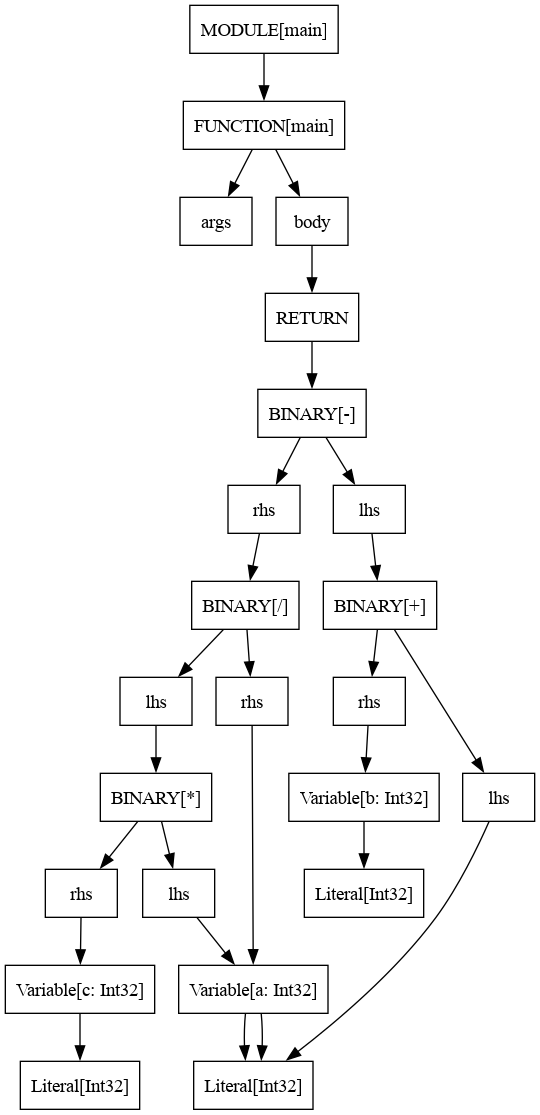

Module

In [9]:
module

## Using Variable without declaring from a list of tokens

To keep this document as simple as possible, let's consider using the lexer code 
for extracting a code from a string to a list of tokens from here:
https://gist.github.com/xmnlab/bfd8cf690c0701d4eabdb5b223b53100#file-lexer-py

so for the follwowing source code: 

```python
a = 1
b = 2
c = 3

1 + b - a * c / a
```
It returns:

In [12]:
lex = [
 {'identifier': 'a'},
 {'op': '='},
 {'number': 1},
 {'newline': True},
 {'identifier': 'b'},
 {'op': '='},
 {'number': 2},
 {'newline': True},
 {'identifier': 'c'},
 {'op': '='},
 {'number': 3},
 {'newline': True},
 {'newline': True},
 {'number': 1},
 {'op': '+'},
 {'identifier': 'b'},
 {'op': '-'},
 {'identifier': 'a'},
 {'op': '*'},
 {'identifier': 'c'},
 {'op': '/'},
 {'identifier': 'a'},
 {'eof': True}]

lex

[{'identifier': 'a'},
 {'op': '='},
 {'number': 1},
 {'newline': True},
 {'identifier': 'b'},
 {'op': '='},
 {'number': 2},
 {'newline': True},
 {'identifier': 'c'},
 {'op': '='},
 {'number': 3},
 {'newline': True},
 {'newline': True},
 {'number': 1},
 {'op': '+'},
 {'identifier': 'b'},
 {'op': '-'},
 {'identifier': 'a'},
 {'op': '*'},
 {'identifier': 'c'},
 {'op': '/'},
 {'identifier': 'a'},
 {'eof': True}]

Now, that we have a list of tokens, let's create our ASTx expressions.

In [14]:
def get_next_token(lex, eat_it=False):
    if eat_it:
        return lex.pop(0)
    return lex[0]


def parse_binary(lex):
    ...


def parse_expression(lex):
    ...
    

def parse(lex) -> list[dict[str, Any]]:
    ast = []
    variables = {}

    while True:
        node = get_next_token(lex, eat_it=True)
        kind, value = list(token.items())[0]

        if kind == "eof":
            break
        
        if kind == "newline":
            if not node:
                continue
            ast.append(node)
            node = {}
            continue
        
        if kind == "identifier":            
            if value not in variables:
                next_token = get_next_token(lex, eat_it=False)

                if next_token != {"op": "="}:
                    raise Exception(f"Identifier{value} not found.")

                get_next_token(lex, eat_it=True)  # eat op =
                ast.append(parse_binary_op(lex))
                continue

            
    return ast

parse(copy.deepcopy(lex))

NameError: name 'token' is not defined

In [ ]:
    
module = astx.Module()

variables = {}

for token in lex:
    print(token)


a = astx.Variable(name="a", 1type_=astx.Int32, value=astx.LiteralInt32(1))
b = astx.Variable(name="b", type_=astx.Int32, value=astx.LiteralInt32(2))
c = astx.Variable(name="c", type_=astx.Int32, value=astx.LiteralInt32(4))

lit_1 = astx.LiteralInt32(1)



"""
basic_op = lit_1 + b - a * c / a + (b - a / a)

main_proto = astx.FunctionPrototype(
    name="main", args=[], return_type=astx.Int32
)
main_block = astx.Block()
main_block.append(astx.FunctionReturn(basic_op))
main_fn = astx.Function(prototype=main_proto, body=main_block)

module.block.append(main_fn)